In [1]:
import pandas as pd

#df = pd.read_csv (r'C:\Users\Farouk\Desktop\prediction\dataset_user_data.csv')
#print (df)

data = pd.read_csv (r'C:\Users\Farouk\Desktop\prediction\dataset_user_data(opinpos_event)500.csv')
#print (data)
df = pd.DataFrame(data, columns= ['opinion_positive','event_participation'])
#print (df)

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   opinion_positive     500 non-null    int64
 1   event_participation  500 non-null    int64
dtypes: int64(2)
memory usage: 7.9 KB


In [3]:
df.head()

,opinion_positive,event_participation
0,3,3
1,68,1
2,65,8
3,73,4
4,41,2


In [4]:
df.isnull().sum()

opinion_positive       0
event_participation    0
dtype: int64

In [5]:
df.shape

(500, 2)

In [6]:
# Import library
import pandas  as pd #Data manipulation
import numpy as np #Data manipulation
import matplotlib.pyplot as plt # Visualization
import seaborn as sns #Visualization
plt.rcParams['figure.figsize'] = [8,8]
plt.rcParams['font.size'] =14
plt.rcParams['font.weight']= 'bold'
plt.style.use('seaborn-whitegrid')

In [7]:
# Import dataset
#path ='dataset/'
print('\nNumber of rows and columns in the data set: ',df.shape)
print('')


Number of rows and columns in the data set:  (500, 2)



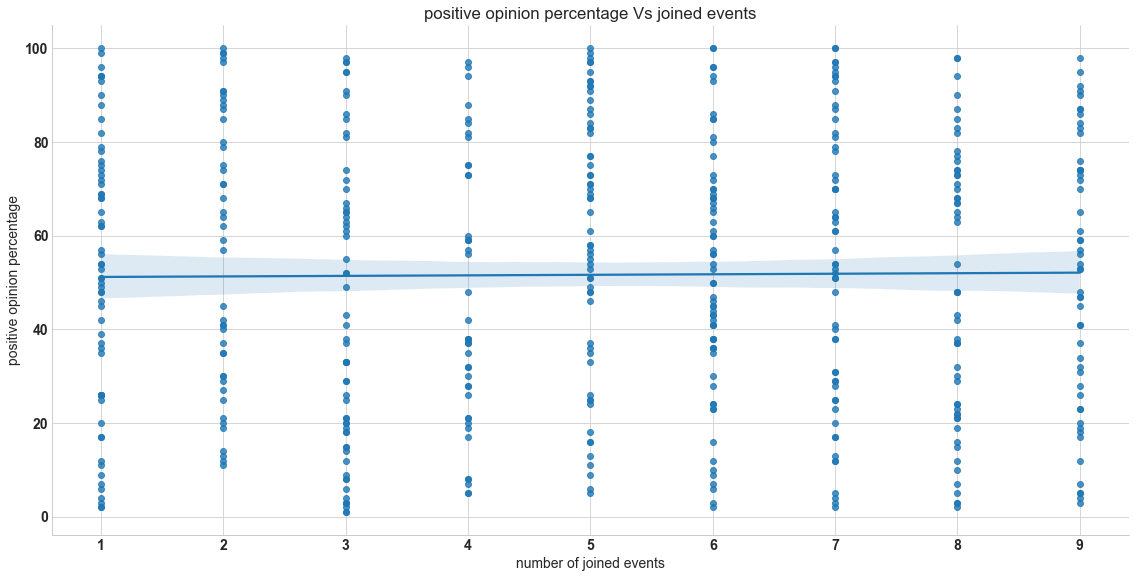

In [8]:
sns.lmplot(y='opinion_positive',x='event_participation',data=df,aspect=2,height=8)
plt.ylabel('positive opinion percentage')
plt.xlabel('number of joined events')
plt.title('positive opinion percentage Vs joined events');

In [9]:
df.corr()

,opinion_positive,event_participation
opinion_positive,1.000000,0.010205
event_participation,0.010205,1.000000


In [10]:
X=df.iloc[:, :1]
y=df.iloc[:, 1]

from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.2, random_state = 0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_X = sc.fit_transform(train_X)
val_X = sc.transform(val_X)

from sklearn.linear_model import LinearRegression
classifier = LinearRegression()
classifier.fit(train_X, train_y)

LinearRegression()

In [11]:
y_pred = classifier.predict(val_X)
print(((y_pred,1), (val_y,1)),1)

((array([5.0834134 , 5.08825789, 5.08519821, 5.09667202, 5.08978773,
       5.08570816, 5.09080763, 5.09386731, 5.09845683, 5.07856891,
       5.09667202, 5.09029768, 5.10202646, 5.09157255, 5.08519821,
       5.09820186, 5.07754901, 5.0959071 , 5.09769191, 5.08978773,
       5.09641704, 5.10228143, 5.08519821, 5.09361234, 5.0795888 ,
       5.07831393, 5.09233747, 5.09692699, 5.0997317 , 5.07907885,
       5.08953276, 5.08647308, 5.08468827, 5.09743694, 5.08392335,
       5.08137361, 5.08953276, 5.09437726, 5.08800292, 5.08621811,
       5.0910626 , 5.08417832, 5.10228143, 5.0997317 , 5.07856891,
       5.08570816, 5.08009875, 5.08698303, 5.09080763, 5.10075159,
       5.08749297, 5.08366837, 5.09794688, 5.08111864, 5.07984377,
       5.09947672, 5.10279138, 5.08392335, 5.08570816, 5.08851287,
       5.09896678, 5.07984377, 5.08137361, 5.07984377, 5.08647308,
       5.08851287, 5.08137361, 5.0834134 , 5.09182752, 5.0987118 ,
       5.08927779, 5.0987118 , 5.09361234, 5.08953276, 5.084

In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(val_y, y_pred)
print(cm)
accuracy_score(val_y, y_pred)

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets